# CAR PRICE PREDICTION WITH MACHINE LEARNING

In [1]:
from zipfile import ZipFile
zip=ZipFile('./archive_.zip')
zip.extractall()

In [64]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [3]:
df=pd.read_csv('car data.csv')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int64  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


In [116]:
df.describe

<bound method NDFrame.describe of      Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0          90    11           3.35           5.59       27000          2   
1          93    10           4.75           9.54       43000          1   
2          68    14           7.25           9.85        6900          2   
3          96     8           2.85           4.15        5200          2   
4          92    11           4.60           6.87       42450          1   
..        ...   ...            ...            ...         ...        ...   
296        69    13           9.50          11.60       33988          1   
297        66    12           4.00           5.90       60000          2   
298        69     6           3.35          11.00       87934          2   
299        69    14          11.50          12.50        9000          1   
300        66    13           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0           

In [117]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,11,3.35,5.59,27000,2,0,1,0
1,93,10,4.75,9.54,43000,1,0,1,0
2,68,14,7.25,9.85,6900,2,0,1,0
3,96,8,2.85,4.15,5200,2,0,1,0
4,92,11,4.60,6.87,42450,1,0,1,0


### Data Preprocessing


*   Encoded alphabets to numeric values!
*   Normalized 'Year' attribute
*   Performed PCA to decompose the size of attributes



In [4]:
#Encoded alphabets to numeric values!
name_encoder=LabelEncoder()
fuel_encoder=LabelEncoder()
sell_encoder=LabelEncoder()
trn_encoder=LabelEncoder()

In [5]:
df['Year']-=min(df['Year'])
df['Car_Name']=name_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type']=fuel_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type']=sell_encoder.fit_transform(df['Selling_type'])
df['Transmission']=trn_encoder.fit_transform(df['Transmission'])

In [81]:
y=df[['Selling_Price', 'Present_Price']]
tar=df[['Car_Name']]
x=df[df.columns.difference(y.columns)]
pca=PCA(n_components=2)
z=pca.fit_transform(x)
y=torch.tensor(np.array(y)).type(torch.float)
x=torch.tensor(np.array(z)).type(torch.float)
x[:,0]=x[:,0]/max(x[:,0])

### Multivariate-Mulitiple Linear Regression


In [82]:
class Linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1=nn.Linear(2,3)
    self.linear2=nn.Linear(3,2)
  def forward(self, x):
    return self.linear2(torch.relu(self.linear1(x)))

In [83]:
class Data(Dataset):
  def __init__(self, x, y):
    super().__init__()
    self.x=x
    self.y=y
  def __len__(self):
    return self.x.size(0)
  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [84]:
data=Data(x,y)
dataloader=DataLoader(dataset=data, batch_size=30)
model=Linear()
optimizer=optim.SGD(model.parameters(), lr=1e-5, momentum=0)
crit=nn.MSELoss()

In [ ]:
loss_values=[]
for epoch in range(300):
  from tqdm import tqdm
  itr=tqdm(dataloader,desc=f'{epoch}')
  for i,j in itr:
    yh=model(i)
    optimizer.zero_grad()
    loss=crit(yh,j)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())

In [90]:
yh=model(x)

### Actual vs Predicted

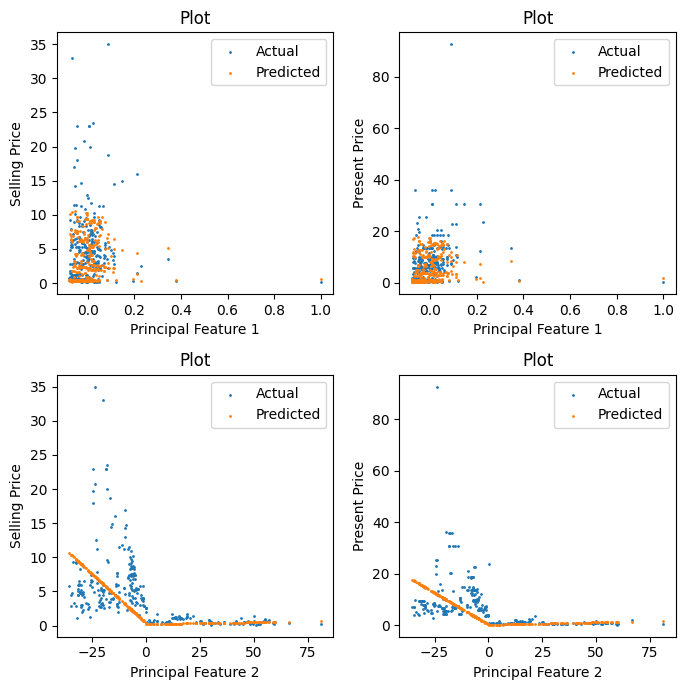

In [122]:
fig, axs = plt.subplots(2, 2,figsize=(7, 7))
for i in range(2):
  for j in range(2):
    axs[i,j].scatter(x[:,i], y[:,j], s=1)
    axs[i,j].scatter(x[:,i],yh[:,j].detach().numpy(), s=1)
    axs[i,j].set_xlabel(f'Principal Feature {i+1}')
    axs[i,j].legend(['Actual', 'Predicted'])
    axs[i,j].set_title(f'Plot')
    if j==0:
      axs[i,j].set_ylabel(f'Selling Price')
    else:
      axs[i,j].set_ylabel(f'Present Price')
plt.tight_layout()